In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns


%matplotlib inline

In [2]:
# Files to Load
listings_df= pd.read_csv(r"C:\Users\polska2207\Downloads\listings (2).csv")
listings_df


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3686,Home in Washington · ★4.64 · 1 bedroom · 1 bed...,4645,Vita,NaN,Historic Anacostia,38.863390,-76.988890,Private room,67.0,31,84,2023-08-30,0.53,1,365,3,NaN
1,3943,Townhouse in Washington · ★4.83 · 1 bedroom · ...,5059,Vasa,NaN,"Edgewood, Bloomingdale, Truxton Circle, Eckington",38.911950,-77.004560,Private room,66.0,1,495,2023-11-22,2.78,5,252,46,Hosted License: 5007242201001033
2,4197,Home in Washington · ★4.85 · 1 bedroom · 1 bed...,5061,Sandra,NaN,"Capitol Hill, Lincoln Park",38.887190,-76.994720,Private room,135.0,7,58,2023-11-11,0.33,2,321,6,Hosted License: 5007242201000749
3,4529,Home in Washington · ★4.66 · 1 bedroom · 1 bed...,5803,Bertina,NaN,"Eastland Gardens, Kenilworth",38.905850,-76.944690,Private room,56.0,30,102,2019-07-05,0.58,2,179,0,Exempt
4,4967,Home in Washington · ★4.74 · 1 bedroom · 1 bed...,7086,Edward,NaN,"Ivy City, Arboretum, Trinidad, Carver Langston",38.912170,-76.992490,Private room,2500.0,1125,30,2016-09-22,0.19,3,365,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6848,1047064894296117631,Rental unit in Washington · ★New · 1 bedroom ·...,107434423,Blueground,NaN,"Shaw, Logan Circle",38.906922,-77.024228,Entire home/apt,173.0,32,0,NaN,NaN,234,105,0,NaN
6849,1047730533367174366,Home in Washington · ★New · 1 bedroom · 1 bed ...,437660791,Eddie-HostelChic,NaN,"Brightwood Park, Crestwood, Petworth",38.949640,-77.016980,Private room,79.0,1,0,NaN,NaN,28,267,0,Exempt
6850,1047772826607759074,Rental unit in Washington · ★New · 1 bedroom ·...,437660791,Eddie-HostelChic,NaN,"Brightwood Park, Crestwood, Petworth",38.951456,-77.016104,Entire home/apt,87.0,1,0,NaN,NaN,28,270,0,Exempt
6851,1047777612294831826,Rental unit in Washington · ★New · 1 bedroom ·...,437660791,Eddie-HostelChic,NaN,"Brightwood Park, Crestwood, Petworth",38.951410,-77.016220,Entire home/apt,79.0,1,0,NaN,NaN,28,270,0,Exempt


In [3]:
# Read in Listings data
listings = pd.read_csv(r"C:\Users\polska2207\Downloads\listings (2).csv")
# Check shape for total number of listings
listings.shape

(6853, 18)

In [4]:
# Look at Listings data
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3686,Home in Washington · ★4.64 · 1 bedroom · 1 bed...,4645,Vita,NaN,Historic Anacostia,38.86339,-76.98889,Private room,67.0,31,84,2023-08-30,0.53,1,365,3,NaN
1,3943,Townhouse in Washington · ★4.83 · 1 bedroom · ...,5059,Vasa,NaN,"Edgewood, Bloomingdale, Truxton Circle, Eckington",38.91195,-77.00456,Private room,66.0,1,495,2023-11-22,2.78,5,252,46,Hosted License: 5007242201001033
2,4197,Home in Washington · ★4.85 · 1 bedroom · 1 bed...,5061,Sandra,NaN,"Capitol Hill, Lincoln Park",38.88719,-76.99472,Private room,135.0,7,58,2023-11-11,0.33,2,321,6,Hosted License: 5007242201000749
3,4529,Home in Washington · ★4.66 · 1 bedroom · 1 bed...,5803,Bertina,NaN,"Eastland Gardens, Kenilworth",38.90585,-76.94469,Private room,56.0,30,102,2019-07-05,0.58,2,179,0,Exempt
4,4967,Home in Washington · ★4.74 · 1 bedroom · 1 bed...,7086,Edward,NaN,"Ivy City, Arboretum, Trinidad, Carver Langston",38.91217,-76.99249,Private room,2500.0,1125,30,2016-09-22,0.19,3,365,0,NaN


In [5]:
# how many unique listings are there
listings['id'].nunique()
# same size as df

6853

In [6]:
#Summary Stats
#Look at describe stats
listings.describe()


,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,6.853000e+03,6.853000e+03,0.0,6853.000000,6853.000000,5995.000000,6853.000000,6853.000000,5365.000000,6853.000000,6853.000000,6853.000000
mean,3.176959e+17,1.316931e+08,NaN,38.910193,-77.013581,194.011676,18.826208,55.743178,1.852078,26.533927,170.040712,13.537867
std,4.164083e+17,1.561191e+08,NaN,0.024760,0.030734,557.907916,39.064745,94.543588,1.960745,60.489484,142.538398,21.431373
min,3.686000e+03,4.492000e+03,NaN,38.819950,-77.112690,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.284937e+07,1.720706e+07,NaN,38.897418,-77.032860,86.000000,2.000000,1.000000,0.340000,1.000000,0.000000,0.000000
50%,4.750696e+07,5.593934e+07,NaN,38.909700,-77.014860,120.000000,3.000000,15.000000,1.240000,2.000000,169.000000,2.000000
75%,7.854032e+17,1.932459e+08,NaN,38.923230,-76.994200,177.000000,31.000000,69.000000,2.810000,13.000000,324.000000,20.000000
max,1.047931e+18,5.510398e+08,NaN,38.992140,-76.910920,10000.000000,1125.000000,954.000000,28.480000,234.000000,365.000000,285.000000


In [7]:
listings.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [12]:
# Look at info stats
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6853 entries, 0 to 6852
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6853 non-null   int64  
 1   name                            6853 non-null   object 
 2   host_id                         6853 non-null   int64  
 3   host_name                       6853 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   6853 non-null   object 
 6   latitude                        6853 non-null   float64
 7   longitude                       6853 non-null   float64
 8   room_type                       6853 non-null   object 
 9   price                           5995 non-null   float64
 10  minimum_nights                  6853 non-null   int64  
 11  number_of_reviews               6853 non-null   int64  
 12  last_review                     53

In [14]:
listings_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [15]:
# group by neighborhood, get mean and median price
grouped_df = listings_df.groupby('neighbourhood')['price'].agg(['mean', 'median']).reset_index()
grouped_df = grouped_df.sort_values(by='mean', ascending=False)
grouped_df

,neighbourhood,mean,median
12,"Dupont Circle, Connecticut Avenue/K Street",438.818627,130.0
11,"Downtown, Chinatown, Penn Quarters, Mount Vern...",322.642157,150.0
20,"Howard University, Le Droit Park, Cardozo/Shaw",300.119658,133.5
17,"Georgetown, Burleith/Hillandale",281.551913,186.0
31,"Southwest Employment Area, Southwest/Waterfron...",244.253521,190.0
36,"West End, Foggy Bottom, GWU",236.682243,160.0
29,"Shaw, Logan Circle",229.025189,133.0
4,"Cathedral Heights, McLean Gardens, Glover Park",224.983871,163.0
37,"Woodland/Fort Stanton, Garfield Heights, Knox ...",212.222222,220.0
10,"Douglas, Shipley Terrace",207.535714,141.0


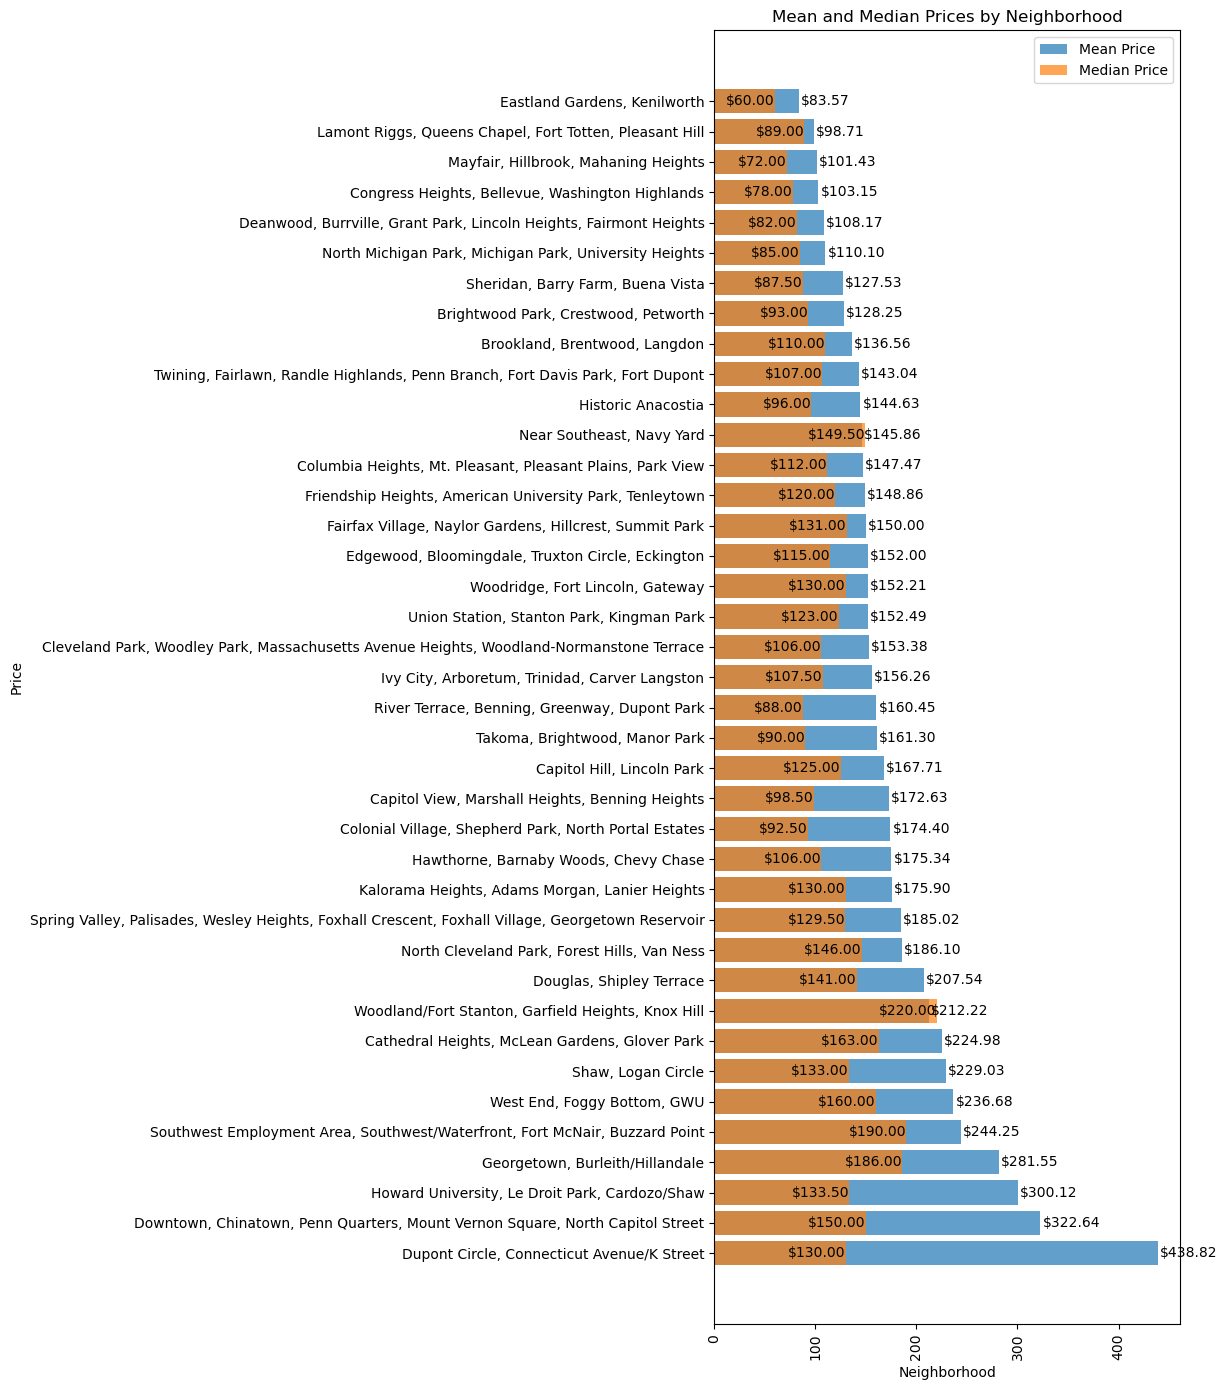

In [16]:
# plot mean and median price by
plt.figure(figsize=(12, 14))
plt.barh(grouped_df['neighbourhood'], grouped_df['mean'], label='Mean Price', alpha=0.7)
plt.barh(grouped_df['neighbourhood'], grouped_df['median'], label='Median Price', alpha=0.7)

plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.title('Mean and Median Prices by Neighborhood')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

# Place xticks on top of each bar
for index, (mean_value, median_value) in enumerate(zip(grouped_df['mean'], grouped_df['median'])):
    plt.text(median_value, index, f'${median_value:.2f}', va='center', multialignment='center', ha='right')
    plt.text(mean_value + 2, index, f'${mean_value:.2f}', va='center', multialignment='center')


# Show the plot
plt.show()

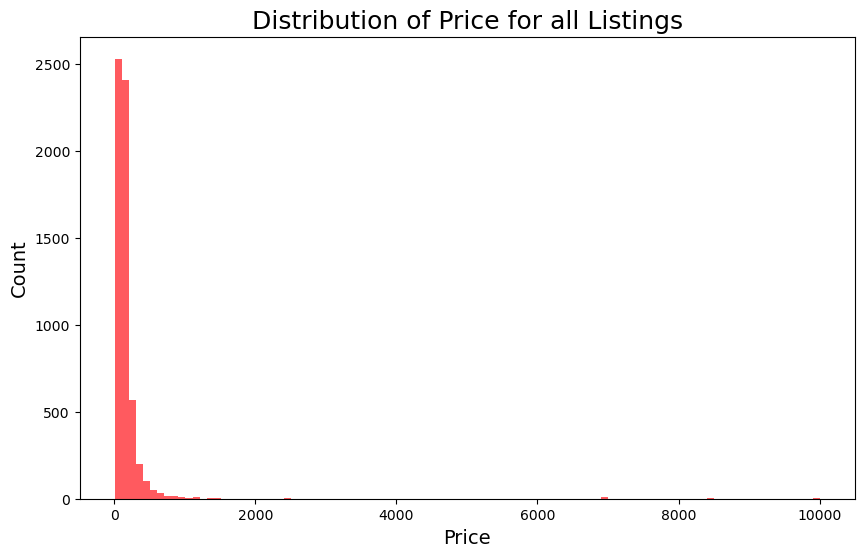

In [13]:
# Look at distribution of prices for full listings dataset
plt.figure(figsize=(10, 6))

plt.hist(listings['price'], bins=100, color='#FF5A5F')
plt.title('Distribution of Price for all Listings', fontdict={'fontsize': 18})
plt.xlabel('Price', fontdict={'fontsize': 14})
plt.ylabel('Count', fontdict={'fontsize': 14});


In [ ]:
# look at cheapest listings
listings[listings['price'] <= 30].shape
# 54 under $18 a night

In [ ]:
# how many listings are over $8,000
listings[listings['price'] > 8000]

In [ ]:
# look at most expensive outliers
listings[listings['price'] > 4500].shape
# only 27 are greater than $4,500

In [ ]:
# creating new dataframe without the 5 highest outliers
listings = listings[listings['price'] < 4500]
listings.shape

In [ ]:
5968 / 6853

In [ ]:
listings.describe()

In [ ]:
# Look at distribution of prices for adjusted listings dataset (without 5 largest outliers)
plt.figure(figsize=(10, 6))

plt.hist(listings['price'], bins=100, color='#FF5A5F')
plt.title('Distribution of Price for Listings Under $4,500 (87% of Data)', fontdict={'fontsize': 18})
plt.xlabel('Price', fontdict={'fontsize': 14})
plt.ylabel('Count', fontdict={'fontsize': 14});


In [ ]:
plt.figure(figsize=(20, 6))
plt.boxplot(listings['price'], vert=False)
plt.title('Airbnb Rental Prices Are Not Normally Distributed', fontdict={'fontsize': 26})
plt.yticks(ticks=[1], labels=['Price'])
plt.xticks(ticks=[0, 2000, 4000, 6000, 8000, 10000], labels=['$0', '$2,000', '$4,000', '$6,000', '$8,000','$10,000']);

In [ ]:
# In above histogram, since much of the data seems to be between 0 and $1,000, creating a new df focusing on that
one_k_listings = listings[listings['price'] < 1000]
one_k_listings.shape

In [ ]:
5936 / 6853

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(one_k_listings['price'], bins=100, color='#FF5A5F')
plt.title('Distribution of Price on Listings Under $1,000 (86% of Data)', fontdict={'fontsize': 18})
plt.xlabel('Price', fontdict={'fontsize': 14})
plt.ylabel('Count of Listings', fontdict={'fontsize': 14});

In [ ]:
# The bulk of the data is still around $300 or lower
# Also logically - tourists might be deterred from a price above $300 a night
affordable_listings = listings[listings['price'] < 300]
affordable_listings.shape

In [ ]:
5452 / 6853

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(one_k_listings['price'], bins=100, color='#FF5A5F')
plt.title('Distribution of Price on Listings Under $1,000 (79% of Data)', fontdict={'fontsize': 18})
plt.xlabel('Price', fontdict={'fontsize': 14})
plt.ylabel('Count of Listings', fontdict={'fontsize': 14});

In [ ]:
# The bulk of the data is still around $300 or lower
# Also logically - tourists might be deterred from a price above $300 a night
affordable_listings = listings[listings['price'] < 300]
affordable_listings.shape

In [ ]:
5452 / 6853
## affordable_listings represents 79% of the data

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(affordable_listings['price'], bins=100, color='#FF5A5F')
plt.title('Distribution of Price Under $300 (79% of Data)', fontdict={'fontsize': 18})
plt.xlabel('Price', fontdict={'fontsize': 14})
plt.ylabel('Count', fontdict={'fontsize': 14});
# even with affordable_listings, still right skewed

In [ ]:
# Also look at relationship between price and minimum number of nights 
plt.figure(figsize=(10,6))

plt.scatter(affordable_listings['minimum_nights'], affordable_listings['price'], color='#FF5A5F')
plt.title('Minimum # of Nights Has No Strong Effect on Price (under $300)', fontdict={'fontsize': 18})
plt.xlabel('Minimum Number of Nights', fontdict={'fontsize': 14})
plt.ylabel('Price', fontdict={'fontsize': 14});
# doesn't seem to be much of a relationship

In [ ]:
# What is the average price per neighborhood? 
hood_price = listings.groupby('neighbourhood')['price'].mean()
hood_price = pd.DataFrame(hood_price)
# round the price to 2 decimals
hood_price['price'] = hood_price['price'].round(2)
# look at 3 neighborhoods with cheapest averages
hood_price.sort_values('price').head(3)

In [ ]:
# look at 3 neighborhood with most expensive averages
hood_price.sort_values('price', ascending=False).head(3)

In [ ]:
# Shorten the neighborhood names
hood_labels = ['Brightwood Park','Brookland','Capitol Hill','Capitol View','Cathedral Heights','Cleveland Park',
               'Colonial Village','Columbia Heights','Congress Heights','Deanwood','Douglas','Downtown/Chinatown',
               'Dupont Circle','Eastland Gardens','Edgewood','Fairfax Village','Friendship Heights','Georgetown',
               'Chevy Chase', 'Historic Anacostia','Howard University','Trinidad','Adams Morgan','Fort Totten',
               'Mayfair','Navy Yard','North Cleveland Park','North Michigan Park','River Terrace','Shaw',
               'Southwest/Waterfront','Spring Valley','Takoma','Twining','Union Station','Foggy Bottom',
               'Woodland/Fort Stanton','Woodridge']

In [ ]:
# Colored boxplots of price distribution in each neighbourhood
plt.figure(figsize=(20, 6))
plt.title('Price Distribution By Neighborhood', size=26)
sns.boxplot(x='neighbourhood', y='price', data=listings);
plt.xticks(rotation=60)
plt.savefig('Neighborhood Box plot.png')


In [ ]:
#Hosts

In [ ]:
listings.head()

In [ ]:
# The 'calculated_host_listings_count' represents how many listings a given host has. 
lph_dict = {'calculated_host_listings_count': 'listings_per_host'}
listings.rename(columns=lph_dict, inplace=True)
listings[listings['listings_per_host'] < 2]

In [ ]:
# Listings per host max is 231 
listings.groupby('host_id')['id'].count().sort_values()

In [ ]:
temp_df = ['host_id']==39930655
listings.rename(columns=lph_dict, inplace=True)
listings[listings['host_id']==39930655]

In [ ]:
231/ 6853

#3% of all listings are the sole listing for that host

In [ ]:
listings['availability_365'].value_counts()

In [ ]:
temp_df = listings[listings['listings_per_host'] == 231]

In [ ]:
temp_df.columns

In [ ]:
# Create new variable for distribution of listings per host
# Listings.groupby('host_id')['id'].count()
listings['listings_per_host']

In [ ]:
plt.figure(figsize=(18, 6))
plt.boxplot(listings['listings_per_host'], vert=False)
plt.title('Listings per Host Distribution', fontdict={'fontsize': 24})
plt.yticks(ticks=[1], labels=['Listings Per Host']);
# plt.xticks(ticks=[0, 2000, 4000, 6000, 8000, 10000], labels=['$0', '$2,000', '$4,000', '$6,000', '$8,000','$10,000']);

In [ ]:
# One host has 231 properties - 'Sojourn'
Sojourn = listings[listings['host_id'] == 39930655 ]
# An analysis of Sojourn

In [ ]:
host_id = 39930655

In [ ]:
# Colored boxplots of price distribution in each neighbourhood
plt.figure(figsize=(14, 6))
plt.title('Price Distribution by Neighborhood for Sojourn Listings', size=18)
sns.boxplot(x='neighbourhood', y='price', data=Sojourn);
plt.xticks(rotation=60)
plt.savefig('Neighborhood Box plot.png')

In [ ]:
Sojourn.columns

In [ ]:
Sojourn.groupby('neighbourhood')['price'].mean().sort_values()

In [ ]:
Sojourn.groupby('neighbourhood')['id'].count().sort_values()

In [ ]:
Sojourn.groupby('room_type')['price'].mean()

In [ ]:
Sojourn['room_type'].value_counts()

In [ ]:
Sojourn['price'].mean()

In [ ]:
Sojourn['availability_365'].mean()

In [ ]:
# Analysis of how much Sojourn makes from his listings
# Create an adjusted price variable - AirBnB takes 3% service fee for using their platform

Sojourn['adj_price'] = Sojourn['price'] - (Sojourn['price'] * .03) 


In [ ]:
# Create a yearly profit variable: the adjusted price multiplied by the availability of that listing in a year
Sojourn['yearly_profit'] = Sojourn['adj_price'] * Sojourn['availability_365']


In [ ]:
# The sum of yearly profit for all listings
Sojourn_annual_profit = Sojourn['yearly_profit'].sum()

# Using a 51.85% occupancy rate, calculate Sojourn' annual profit
Sojourn_annual_profit * .5185


In [ ]:
#Room Type

In [ ]:
# Look at how many of each room type there are 
listings['room_type'].value_counts()

In [ ]:
listings['room_type'].value_counts(normalize=True)

In [ ]:
roomtype_value_counts = [4571, 1324, 63, 10]

In [ ]:
roomtypes = ['Entire home/apt','Private room','Shared room', 'Hotel room']

In [ ]:
# Average price per room type
listings.groupby('room_type')['price'].mean()

In [ ]:
# Plot count of each room type to show what is most common
plt.figure(figsize=(10, 8))
plt.bar(x=roomtypes, height=roomtype_value_counts, color='#FF5A5F')
plt.title('76% of Listings are Entire Home/Apt', fontdict={'fontsize': 18})
plt.xlabel('Room Type', fontdict={'fontsize': 14})
plt.ylabel("Count", fontdict={'fontsize': 14});

In [ ]:
# Which type of room gets the most reviews
listings.groupby('room_type')['number_of_reviews'].mean()

In [ ]:
#Reviews
listings.head()

In [ ]:
# Reviews per month 
plt.figure(figsize=(10, 6))
plt.hist(listings['reviews_per_month'], color='#FF5A5F')
plt.title('Distribution of Reviews per Month')
plt.xlabel('Reviews per Month')
plt.ylabel('Count');

In [ ]:
listings['reviews_per_month'].mean()

In [ ]:
listings.describe()

In [ ]:
listings[listings['reviews_per_month'] > 6]

In [ ]:
# Uniques license
# Strip actual license numbers to group licensed operators

license_df = listings_df.copy()
license_df['license'] = license_df['license'].str.split(':').str[0]

print(len(license_df.license.unique()))
print(license_df.license.unique())
value_count = license_df.license.value_counts(dropna=False)
print(f'Total: {value_count.sum()}')

# Create a pandas DataFrame for the value counts
value_counts_df = pd.DataFrame({'License Type': license_df.license.unique(), 'Count': value_count}).reset_index(drop=True)

# Print the value counts DataFrame
value_counts_df

In [ ]:
# Drop misc
value_counts_df = value_counts_df.iloc[:4]
value_counts_df['License Type'].fillna('Unlicensed', inplace=True)
value_counts_df

In [ ]:
# donut chart
import seaborn as sns

# cmap = plt.cm.get_cmap('tab20c', 4)
# colors = cmap.colors
colors = sns.color_palette("Set2", n_colors=4)
# colors = sns.color_palette("pastel", n_colors=4)
# colors = sns.color_palette("Accent", n_colors=4)
# colors = sns.color_palette("tab10", n_colors=4) # the default


# Plot the pie chart
plt.pie(
    value_counts_df['Count'],
    labels=value_counts_df['License Type'],
    # explode=(0.03, 0.15, 0.03, 0.03),
    colors=colors,
    shadow=True,
    startangle=120,
    autopct="%1.2f%%",
    pctdistance=0.8,
    counterclock=False,
)

# Add title
plt.title("Licenses", fontweight="bold")

# Add a donut hole
donut = plt.Circle((0, 0), 0.65, facecolor="white")
plt.gcf().gca().add_artist(donut)

# Show the plot
plt.show()